In [11]:
sys.path.insert(0, '/home/566/nd0349/notebooks/functions')
from plotting import create_map_axis, plot_style, add_subplot_label, set_ax_date
from functions import cyclic_moving_av

# Plot settings
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=False)
textwidth = 3.31314*2
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio

mpl.rcParams.update({"axes.grid" : True, "grid.color": [0.6, 0.6, 0.6]})
sns.color_palette("colorblind",15)

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [2]:
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.animation as animation
import math
import cmocean.cm as cmo


df = pd.read_csv('/home/566/nd0349/notebooks/mabel-data.csv')
df.head(5)

,Unnamed: 0,1,1.1,1.2,1.3,1.4,1.5
0,Wavelength (nm),-0.500000,0.000000,0.250000,0.500000,1.000000,2.000000
1,200.2560542,0.397173,0.395838,0.410843,0.426195,0.419764,0.398110
2,200.6382822,0.414550,0.419116,0.421463,0.411518,0.437300,0.404316
3,201.0204725,0.420993,0.412339,0.408577,0.412735,0.412207,0.401148
4,201.402625,0.387745,0.405757,0.395077,0.429810,0.414984,0.386981


In [3]:
# Wrangle the data
x_init = np.transpose(df.iloc[1:,0].values).astype(np.float)
t_init = np.array(df.iloc[0,1:].values,dtype='float64')

z_init = np.zeros((len(t_init), len(x_init)))
z_init[0,:] = df.iloc[1:,1].values
z_init[1,:] = df.iloc[1:,2].values
z_init[2,:] = df.iloc[1:,3].values
z_init[3,:] = df.iloc[1:,4].values
z_init[4,:] = df.iloc[1:,5].values
z_init[5,:] = df.iloc[1:,6].values
print(z_init.shape)
t_init.min()

(6, 1746)


/jobfs/94997779.gadi-pbs/ipykernel_3691915/2843030827.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_init = np.transpose(df.iloc[1:,0].values).astype(np.float)


-0.5

In [14]:
from matplotlib import cm
#cmap = cmo.thermal(range(256))
cmap = cm.Oranges_r(plt.Normalize(min(range(6)),max(range(8)))(range(2,8)))
#cm.cool_r(plt.Normalize(min(range(6)),max(range(6)))(range(6)))
print(cmap)

print(cm.Oranges_r(plt.Normalize(min(range(6)),max(range(6)))(range(6))))
#cmap = cmap[0::42,:]
#cmap = cmap[-1:0:-1,:]
cmap

[[0.87829296 0.31990773 0.024406   1.        ]
 [0.96484429 0.47100346 0.14197616 1.        ]
 [0.99215686 0.62805075 0.34226836 1.        ]
 [0.99215686 0.77699346 0.57270281 1.        ]
 [0.99557093 0.89079585 0.78551326 1.        ]
 [1.         0.96078431 0.92156863 1.        ]]
[[0.49803922 0.15294118 0.01568627 1.        ]
 [0.77098039 0.25411765 0.00705882 1.        ]
 [0.9545098  0.44       0.10666667 1.        ]
 [0.99215686 0.65647059 0.3827451  1.        ]
 [0.99372549 0.85019608 0.70431373 1.        ]
 [1.         0.96078431 0.92156863 1.        ]]


array([[0.87829296, 0.31990773, 0.024406  , 1.        ],
       [0.96484429, 0.47100346, 0.14197616, 1.        ],
       [0.99215686, 0.62805075, 0.34226836, 1.        ],
       [0.99215686, 0.77699346, 0.57270281, 1.        ],
       [0.99557093, 0.89079585, 0.78551326, 1.        ],
       [1.        , 0.96078431, 0.92156863, 1.        ]])

Plotting frames: 100%|██████████| 151/151 [05:43<00:00,  2.27s/it]


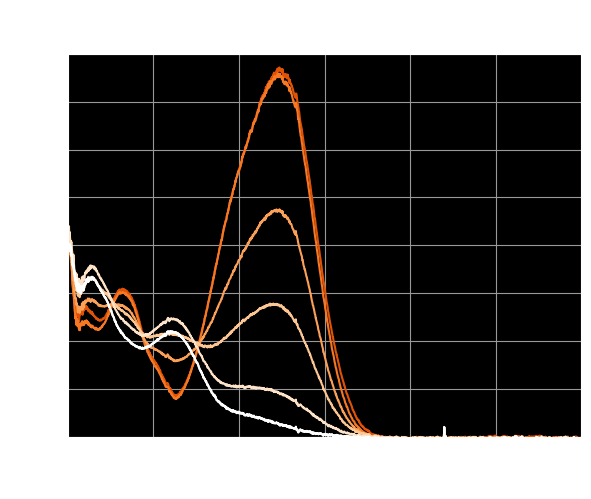

In [19]:
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.animation as animation

#fig, ax = plt.subplots()
fig = plt.figure(figsize=[width, height])

ax = fig.add_subplot(1, 1, 1)


ax.spines['bottom'].set_color(COLOR)
ax.spines['top'].set_color(COLOR)
ax.spines['right'].set_color(COLOR)
ax.spines['left'].set_color(COLOR)

# z_init = np.asarray([[0, 1, 1, 2, 2.5, 3, 4, 8, 10, 8, 3, 2], [0, 1, 1, 2, 10.5, 8, 4, 5, 2, 2, 3, 2]])
# length_mat,width_mat = z_init.shape
# x_init = np.linspace(0,100,width_mat)
# t_init = 0
# t_end = 50


timesteps = 151 # 101
x_resolution = 1746
x = np.linspace(x_init.min(), x_init.max(), x_resolution)
t = np.linspace(t_init.min(), t_init.max(), timesteps)

z = np.zeros((timesteps,x_resolution))
#z[0,:] = np.interp(x, x_init, z_init[0,:])
#z[-1,:] = np.interp(x, x_init, z_init[-1,:])


for i in range(x_resolution):
    z[:,i] = np.interp(t, t_init, z_init[:,i])
    

line1 = ax.plot(x, z[0,:], label=f'Cluster 1', color = 'white', linestyle='-', zorder=100)[0]

ax.set(xlim=[x[0], x[-1]], ylim=[0, 0.8])
ax.set_xlabel('Wavelength/nm', fontsize = 18)
ax.set_ylabel('Abs/a.u.', fontsize = 18)
ax.set_facecolor("black")
#plt.figure(facecolor='black')
#time_text = ax.text(.5, .9, '', fontsize=15, transform=ax.transAxes, color = 'white')

savepath = '/home/566/nd0349/notebooks/figures/gif/mabel'

for frame, z_val in tqdm(enumerate(range(timesteps)), total = timesteps, desc='Plotting frames'):
    frame = frame 

    sys.stdout.flush()

    fig.suptitle('$t=%.1f$ hours'%(t[frame]), fontsize=20, x=0.5, y = 0.97)
    #    time_text.set_text('$t=%.1f$ hours'%(t[frame]))
    
    sys.stdout.flush()
    y = z[frame,:]

    line1.set_xdata(x)#[:frame])
    line1.set_ydata(z[frame,:])


    for i,time in enumerate(t_init):
        if t[frame] == time:
            #print(i)
            line2 = ax.plot(x, z_init[i,:] , color = cmap[i,:], linestyle='-')#[0]

    
    s1 = f'{frame:03d}'
    plt.savefig(savepath + '/' + 'mabel' +'-' + s1 +'.png', dpi = 1000, transparent=True)
    

# def update(frame):
#     sys.stdout.flush()
#     #print(t[frame])
#     #x = x#[:frame]
#     y = z[frame,:]

#     line1.set_xdata(x)#[:frame])
#     line1.set_ydata(z[frame,:])

#     time_text.set_text('$t=%.1f$ hours'%(t[frame]))
#     for i,time in enumerate(t_init):
#         if t[frame] == time:
#             print(i)
#             line2 = ax.plot(x, z_init[i,:] , color = cmap[i,:], linestyle='-')#[0]


#     return (line1)

# ani = animation.FuncAnimation(fig=fig, func=update, frames=timesteps, interval=((10*1000)/timesteps)) # Should be 1 seconds
# ani.save(filename="/home/566/nd0349/notebooks/mabel.gif", writer="imagemagick",dpi=300, savefig_kwargs={"transparent": True})
# plt.show()




# ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
# video = ani.to_html5_video()
# html = display.HTML(video)
# display.display(html)

# plt.show()

In [43]:
# from PIL import Image
# frame_folder = '/home/566/nd0349/notebooks/figures/gif/'
# dframe = 1
# gifname = frame_folder + '/' + 'mabel'
# sorted_frames = sorted(glob.glob(f"{frame_folder}/"+'mabel'+ "*.png")[0:-1:1])
# frames = [Image.open(image) for image in sorted_frames[0:len(sorted_frames):dframe]]
# frame_one = frames[0]
# frame_one.save(gifname + ".gif", format="GIF", append_images=frames,
#            save_all=True, duration=120, loop=0, transparency=0, disposal=2)

In [23]:
from typing import Tuple, List, Union
from collections import defaultdict
from random import randrange
from itertools import chain

from PIL.Image import Image
import PIL.Image


class TransparentAnimatedGifConverter(object):
    _PALETTE_SLOTSET = set(range(256))

    def __init__(self, img_rgba: Image, alpha_threshold: int = 0):
        self._img_rgba = img_rgba
        self._alpha_threshold = alpha_threshold

    def _process_pixels(self):
        """Set the transparent pixels to the color 0."""
        self._transparent_pixels = set(
            idx for idx, alpha in enumerate(
                self._img_rgba.getchannel(channel='A').getdata())
            if alpha <= self._alpha_threshold)

    def _set_parsed_palette(self):
        """Parse the RGB palette color `tuple`s from the palette."""
        palette = self._img_p.getpalette()
        self._img_p_used_palette_idxs = set(
            idx for pal_idx, idx in enumerate(self._img_p_data)
            if pal_idx not in self._transparent_pixels)
        self._img_p_parsedpalette = dict(
            (idx, tuple(palette[idx * 3:idx * 3 + 3]))
            for idx in self._img_p_used_palette_idxs)

    def _get_similar_color_idx(self):
        """Return a palette index with the closest similar color."""
        old_color = self._img_p_parsedpalette[0]
        dict_distance = defaultdict(list)
        for idx in range(1, 256):
            color_item = self._img_p_parsedpalette[idx]
            if color_item == old_color:
                return idx
            distance = sum((
                abs(old_color[0] - color_item[0]),  # Red
                abs(old_color[1] - color_item[1]),  # Green
                abs(old_color[2] - color_item[2])))  # Blue
            dict_distance[distance].append(idx)
        return dict_distance[sorted(dict_distance)[0]][0]

    def _remap_palette_idx_zero(self):
        """Since the first color is used in the palette, remap it."""
        free_slots = self._PALETTE_SLOTSET - self._img_p_used_palette_idxs
        new_idx = free_slots.pop() if free_slots else \
            self._get_similar_color_idx()
        self._img_p_used_palette_idxs.add(new_idx)
        self._palette_replaces['idx_from'].append(0)
        self._palette_replaces['idx_to'].append(new_idx)
        self._img_p_parsedpalette[new_idx] = self._img_p_parsedpalette[0]
        del(self._img_p_parsedpalette[0])

    def _get_unused_color(self) -> tuple:
        """ Return a color for the palette that does not collide with any other already in the palette."""
        used_colors = set(self._img_p_parsedpalette.values())
        while True:
            new_color = (randrange(256), randrange(256), randrange(256))
            if new_color not in used_colors:
                return new_color

    def _process_palette(self):
        """Adjust palette to have the zeroth color set as transparent. Basically, get another palette
        index for the zeroth color."""
        self._set_parsed_palette()
        if 0 in self._img_p_used_palette_idxs:
            self._remap_palette_idx_zero()
        self._img_p_parsedpalette[0] = self._get_unused_color()

    def _adjust_pixels(self):
        """Convert the pixels into their new values."""
        if self._palette_replaces['idx_from']:
            trans_table = bytearray.maketrans(
                bytes(self._palette_replaces['idx_from']),
                bytes(self._palette_replaces['idx_to']))
            self._img_p_data = self._img_p_data.translate(trans_table)
        for idx_pixel in self._transparent_pixels:
            self._img_p_data[idx_pixel] = 0
        self._img_p.frombytes(data=bytes(self._img_p_data))

    def _adjust_palette(self):
        """Modify the palette in the new `Image`."""
        unused_color = self._get_unused_color()
        final_palette = chain.from_iterable(
            self._img_p_parsedpalette.get(x, unused_color) for x in range(256))
        self._img_p.putpalette(data=final_palette)

    def process(self) -> Image:
        """Return the processed mode `P` `Image`."""
        self._img_p = self._img_rgba.convert(mode='P')
        self._img_p_data = bytearray(self._img_p.tobytes())
        self._palette_replaces = dict(idx_from=list(), idx_to=list())
        self._process_pixels()
        self._process_palette()
        self._adjust_pixels()
        self._adjust_palette()
        self._img_p.info['transparency'] = 0
        self._img_p.info['background'] = 0
        return self._img_p


def _create_animated_gif(images: List[Image], durations: Union[int, List[int]]) -> Tuple[Image, dict]:
    """If the image is a GIF, create an its thumbnail here."""
    save_kwargs = dict()
    new_images: List[Image] = []

    for frame in images:
        thumbnail = frame.copy()  # type: Image
        thumbnail_rgba = thumbnail.convert(mode='RGBA')
        thumbnail_rgba.thumbnail(size=frame.size, reducing_gap=3.0)
        converter = TransparentAnimatedGifConverter(img_rgba=thumbnail_rgba)
        thumbnail_p = converter.process()  # type: Image
        new_images.append(thumbnail_p)

    output_image = new_images[0]
    save_kwargs.update(
        format='GIF',
        save_all=True,
        optimize=False,
        append_images=new_images[1:],
        duration=durations,
        disposal=2,  # Other disposals don't work
        loop=0)
    return output_image, save_kwargs


def save_transparent_gif(images: List[Image], durations: Union[int, List[int]], save_file):
    """Creates a transparent GIF, adjusting to avoid transparency issues that are present in the PIL library

    Note that this does NOT work for partial alpha. The partial alpha gets discarded and replaced by solid colors.

    Parameters:
        images: a list of PIL Image objects that compose the GIF frames
        durations: an int or List[int] that describes the animation durations for the frames of this GIF
        save_file: A filename (string), pathlib.Path object or file object. (This parameter corresponds
                   and is passed to the PIL.Image.save() method.)
    Returns:
        Image - The PIL Image object (after first saving the image to the specified target)
    """
    root_frame, save_args = _create_animated_gif(images, durations)
    root_frame.save(save_file, **save_args)

from PIL import Image
frame_folder = '/home/566/nd0349/notebooks/figures/gif/mabel'
dframe = 1
gifname = frame_folder + '/' + 'mabel.gif'
sorted_frames = sorted(glob.glob(f"{frame_folder}/"+'mabel'+ "*.png")[::1])
frames = [Image.open(image) for image in sorted_frames[0:len(sorted_frames):dframe]]

gif_length = 15*1000
save_transparent_gif(images = frames, durations = gif_length/len(frames), save_file = gifname)

In [66]:
sorted_frames

['/home/566/nd0349/notebooks/figures/gif/mabel-00.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-01.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-02.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-03.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-04.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-05.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-06.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-07.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-08.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-09.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-10.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-100.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-11.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-12.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-13.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-14.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-15.png',
 '/home/566/nd0349/notebooks/figures/gif/mabel-

In [ ]:
t = np.linspace(0, 50, timesteps)

z = np.zeros((timesteps,len(x)))
z[0,:] = np.interp(x, x_init, z_init[0,:])
z[-1,:] = np.interp(x, x_init, z_init[-1,:])
i = 10
z[:,i] = np.interp(t, [t_init, t_end], [z_init[0,i], z_init[-1,i]])

#for i in range(length_mat):
#    z[:,i] = np.interp(t, [t_init, t_end], [z_init[0,i], z_init[-1,i]])

In [224]:
z.shape

(100, 1746)

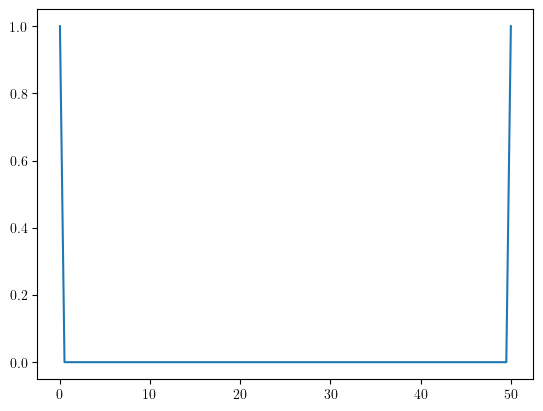

In [146]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(t, z[:,10])
plt.show()

# Histogram

In [65]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
cmap_rgb =np.asarray([[241,238,246, 256], [215,181,216, 256], [223,101,176, 256], [221,28,119, 256] , [152,0,67, 256]])/256
pinks = ListedColormap('my_list', cmap_rgb)
pinks

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

In [66]:
cmap_rgb

array([[0.94140625, 0.9296875 , 0.9609375 , 1.        ],
       [0.83984375, 0.70703125, 0.84375   , 1.        ],
       [0.87109375, 0.39453125, 0.6875    , 1.        ],
       [0.86328125, 0.109375  , 0.46484375, 1.        ],
       [0.59375   , 0.        , 0.26171875, 1.        ]])

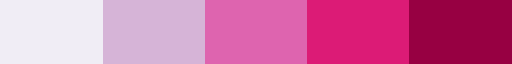

In [74]:
cmap = ListedColormap([[0.94140625, 0.9296875 , 0.9609375 , 1.], 
                       [0.83984375, 0.70703125, 0.84375   , 1.        ], 
                       [0.87109375, 0.39453125, 0.6875    , 1.        ],
                       [0.86328125, 0.109375  , 0.46484375, 1.        ],
                       [0.59375   , 0.        , 0.26171875, 1.        ]
                      ])
cmap

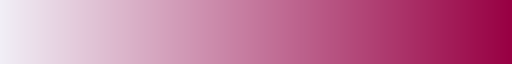

In [78]:
#cm = sns.color_palette(cmap, as_cmap=True)
cm = sns.color_palette("blend:#f1eef6,#980043", as_cmap=True)

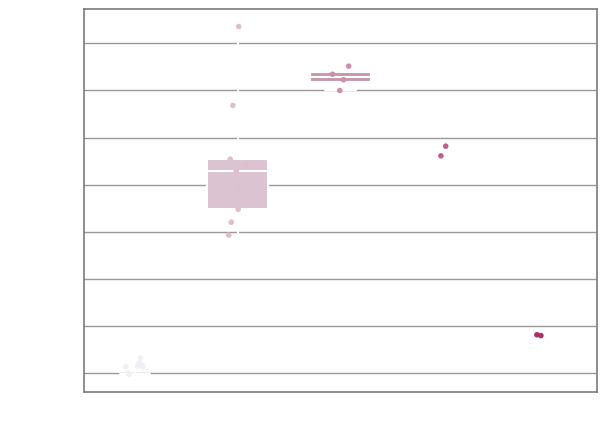

In [109]:
import seaborn as sns
rc('text', usetex=True)
SSR_STO = -np.asarray([-0.041276459, -0.036938319, -0.03315878, 0.005871959, -0.002828933, -0.034013991, -0.04274514, -0.081538865, -0.055312873])
zero_mol = -np.asarray([-1.839231296, -1.105403392, -1.135494493, -0.733122744, -0.801317478, -0.986912568, -0.869732462, -1.420571644, -1.075082266, -0.824308405, -0.926527858])
one_mol = -np.asarray([-1.557076007, -1.629060862, -1.586027008, -1.499969216])
five_mol = -np.asarray([-1.153324725, -1.204826609])
ten_mol = -np.asarray([-0.200098977, -0.204401411])


# Plot settings
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=False)
textwidth = 3.31314*2
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio

mpl.rcParams.update({"axes.grid" : True, "grid.color": [0.6, 0.6, 0.6]})
sns.color_palette("colorblind",15)

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR


fig = plt.figure(figsize=[width, height])

ax = fig.add_subplot(1, 1, 1)

df = pd.Series(SSR_STO, name="STO").to_frame().join(pd.Series(zero_mol, name="Al:STO-$0\%$")).join(pd.Series(one_mol, name="Al:STO-$1\%$")).join(pd.Series(five_mol, name="Al:STO-$5\%$")).join(pd.Series(ten_mol, name="Al:STO-$10\%$"))
cm = sns.color_palette("blend:#f1eef6,#980043")#, as_cmap=True)
sns.set_palette(sns.color_palette("blend:#f1eef6,#980043"))
PROPS = {
    'boxprops':{'edgecolor':'gray'},
    'medianprops':{'color':'gray'},
    'whiskerprops':{'color':'gray'},
    'capprops':{'color':'gray'}
}
sns.boxplot(data=df,
            whis=[0, 100], width=.6, 
            **PROPS)#, palette = cm)

sns.stripplot(data=df, size=4, #color=".9",
              linewidth=0) # width = 0.2) 

ax.set(ylabel='k/h$^{-1}$')#, title='time/h', ylim=(0,2))
plt.setp(ax.artists, edgecolor = 'w')#, facecolor='w')
plt.setp(ax.lines, color='w')
ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_color('gray')

plt.savefig('mabel-histogram.png', dpi = 1000, transparent=True)


#sns.boxplot(ax=ax, x = np.ones(len(SSR_STO)), y=SSR_STO)# x="day", y="total_bill",
            #hue="smoker", palette=["m", "g"],
            #data=tips)
#sns.boxplot(ax=ax, x = 2*np.ones(len(zero_mol)), y=zero_mol)

In [112]:
df

,Name,k
0,SSR-STO,-0.045906
1,SSR-STO,-0.058928
2,SSR-STO,-0.074758
3,SSR-STO,-0.061142
4,STO-Al-a,-3.066138
5,STO-Al-a,-2.773698
6,STO-Al-a,-5.113122
7,STO-Al-a,-5.405538
8,STO-Al-b,-1.067305
9,STO-Al-b,-1.105231


/jobfs/95388092.gadi-pbs/ipykernel_2881580/3309208073.py:40: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=df["Name"], y = df["k"], #data=df,
/jobfs/95388092.gadi-pbs/ipykernel_2881580/3309208073.py:40: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.stripplot(x=df["Name"], y = df["k"], #data=df,


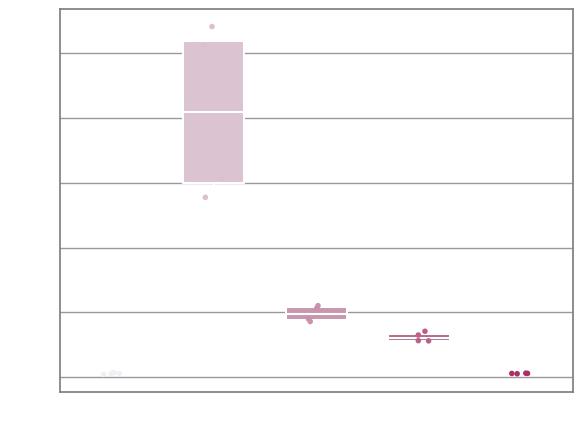

In [129]:
df = pd.read_csv('/home/566/nd0349/notebooks/data/STO-PC-MO-Cameron.csv')

# Plot settings
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=False)
textwidth = 3.31314*2
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio

mpl.rcParams.update({"axes.grid" : True, "grid.color": [0.6, 0.6, 0.6]})
sns.color_palette("colorblind",15)

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR


fig = plt.figure(figsize=[width, height])

ax = fig.add_subplot(1, 1, 1)

#df = pd.Series(SSR_STO, name="STO").to_frame().join(pd.Series(zero_mol, name="Al:STO-$0\%$")).join(pd.Series(one_mol, name="Al:STO-$1\%$")).join(pd.Series(five_mol, name="Al:STO-$5\%$")).join(pd.Series(ten_mol, name="Al:STO-$10\%$"))
cm = sns.color_palette("blend:#f1eef6,#980043")#, as_cmap=True)
sns.set_palette(sns.color_palette("blend:#f1eef6,#980043"))
PROPS = {
    'boxprops':{'edgecolor':'gray'},
    'medianprops':{'color':'gray'},
    'whiskerprops':{'color':'gray'},
    'capprops':{'color':'gray'}
}
df["k"] = -df["k"]
sns.boxplot(x=df["Name"], y = df["k"],
            whis=[0, 100], width=.6, 
            **PROPS)#, palette = cm)

sns.stripplot(x=df["Name"], y = df["k"], #data=df, 
              size=4, palette = cm, #color=".9",
              linewidth=0) # width = 0.2) 

ax.set(ylabel='k/h$^{-1}$')#, title='time/h', ylim=(0,2))
plt.setp(ax.artists, edgecolor = 'w')#, facecolor='w')
plt.setp(ax.lines, color='w')
ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.set_xticklabels(['STO','Al:STO-$0\%$','Al:STO-$1\%$','Al:STO-$5\%$','Al:STO-$10\%$'])
ax.set_xlabel('')

plt.savefig('notebooks/mabel-histogram.png', dpi = 1000, transparent=True)


In [122]:
df

,Name,k
0,SSR-STO,0.045906
1,SSR-STO,0.058928
2,SSR-STO,0.074758
3,SSR-STO,0.061142
4,STO-Al-a,3.066138
5,STO-Al-a,2.773698
6,STO-Al-a,5.113122
7,STO-Al-a,5.405538
8,STO-Al-b,1.067305
9,STO-Al-b,1.105231


<AxesSubplot:>

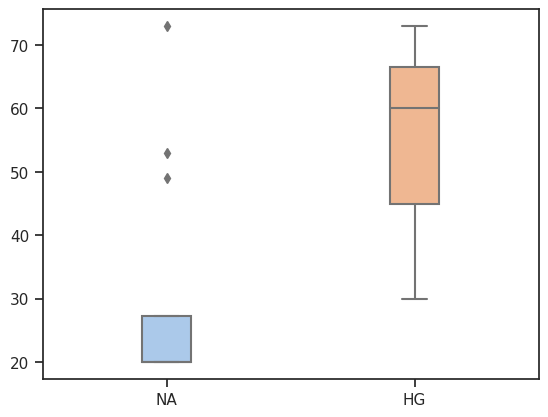

In [22]:
NA = [73, 49, 53, 20, 20, 20, 20, 20, 20, 20, 20, 20]
HG = [73, 30, 60]

df = pd.Series(NA, name="NA").to_frame().join(pd.Series(HG, name="HG"))
sns.boxplot(data=df, width = 0.2) 

In [19]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

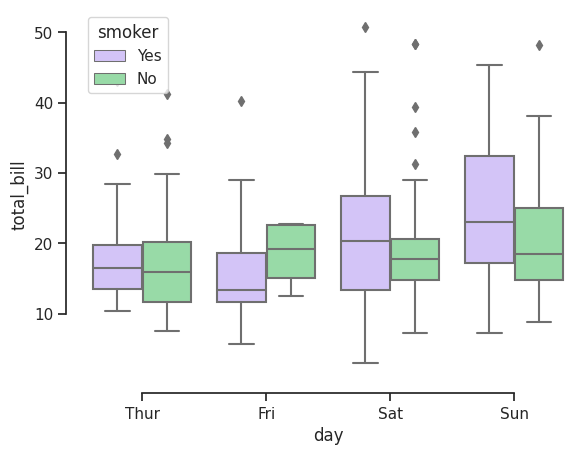

In [12]:
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)